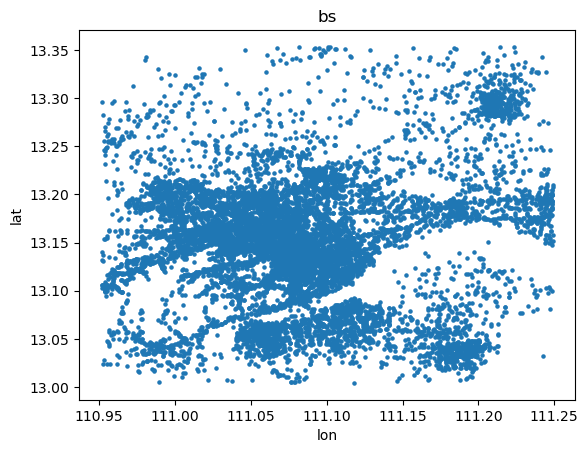

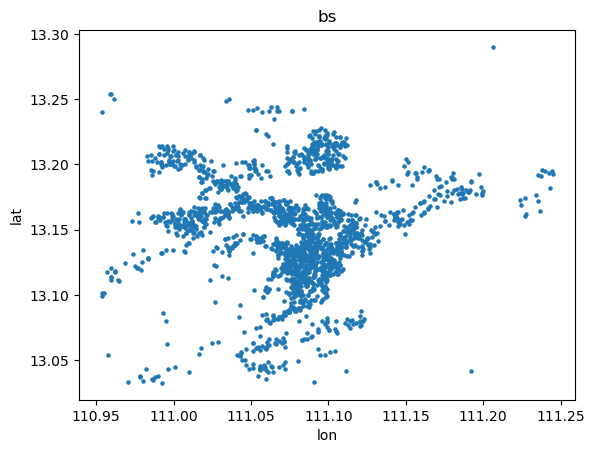

<Figure size 640x480 with 0 Axes>

In [4]:
# 展示拓扑图

import pandas as pd
import matplotlib.pyplot as plt
import os
current_directory = os.getcwd()

# 读取csv文件
df = pd.read_csv(current_directory + '/topology.csv')
# 绘制散点图
plt.scatter(df['lon'], df['lat'],s=5)
# 添加标题和坐标轴标签
plt.title('bs')
plt.xlabel('lon')
plt.ylabel('lat')
# 显示图形
plt.show()
plt.savefig(current_directory + '/origin.png')


df2 = pd.read_csv(current_directory + '/valid_topology.csv')
# 绘制散点图
plt.scatter(df2['lon'], df2['lat'],s=5)
# 添加标题和坐标轴标签
plt.title('bs')
plt.xlabel('lon')
plt.ylabel('lat')
# 显示图形
plt.show()
plt.savefig(current_directory + '/t.png')

In [5]:
# 将时间进行转换，并且只保留packets

import pandas as pd
from datetime import datetime, timedelta, timezone

# 定义北京时区
tz_beijing = timezone(timedelta(hours=8))

current_directory = os.getcwd()
# 读取csv文件
df = pd.read_csv( current_directory + '/cellular_traffic.csv')

# 定义一个函数，将UNIX纪元时间转换为常规日期和时间
def convert_time(time_hour):
    dt = datetime.fromtimestamp(time_hour, tz=tz_beijing)
    return dt.strftime('%Y-%m-%d %H:%M:%S')

# 应用函数，将time_hour列转换为常规日期和时间
df['time_hour'] = df['time_hour'].apply(convert_time)

df_pivot = df.pivot(index='time_hour', columns='bs', values='packets')

# 将结果保存到新的csv文件中
df_pivot.to_csv(current_directory + '/beijing_cellular_traffic.csv', index=True)

In [6]:
# 只保留拥有足够数据的bs


import pandas as pd
import os
import pandas as pd
current_directory = os.getcwd()
# 读取csv文件
df = pd.read_csv(current_directory + '/beijing_cellular_traffic.csv',index_col=0)
# print(df.columns)
# selected_bs_ids = [2355, 4432, 4436, 4813, 5239, 5240, 5297, 5312, 5451, 5655, 5806, 5833, 5885, 5991, 6129, 6130, 6131, 6132, 6188, 6287, 6288, 6290, 6331, 6429, 6538, 6548, 6549, 6580, 6583, 6659, 6745, 6755, 6842, 6843, 6844, 6845, 6871, 6930, 6955, 6999, 7065, 7076, 7097, 7142, 7143, 7146, 7167, 7196, 7204, 7223, 7224, 7295, 7296, 7297, 7298, 7299, 7310, 7311, 7341, 7342, 7373, 7374, 7420, 7422, 7423, 7471, 7525, 7530, 7531, 7561, 7562, 7631, 7656, 7658, 7659, 7678, 7680, 7693, 7721, 7735, 7738, 7759, 7786, 7787, 7796, 7811, 7823, 7828, 7834, 7901, 7932, 7941, 7956, 7970, 7977, 7980, 7985, 7988, 7991, 7993, 7995, 7996, 7997, 7999]
# selected_bs_ids =  [str(i) for i in selected_bs_ids]
# print(selected_bs_ids)
# df = df[selected_bs_ids]

# print(df.index)
# 筛选出超过67个有效单元格的基站id
valid_bs = df.count(axis=0)
print(valid_bs,end='\n\n') # bsid 个数
valid_bs_ids = valid_bs[valid_bs >= 192].index
print(valid_bs_ids,end='\n\n') # 得到的是bs id
print(type(valid_bs_ids))


df_topology = pd.read_csv(current_directory + '/topology.csv')
# 将 'bs' 列转换为字符串类型
df_topology['bs'] = df_topology['bs'].astype(str)

valid_bs_info = df_topology[df_topology['bs'].isin(valid_bs_ids)]
# print(valid_bs_info)
valid_bs_info.to_csv(current_directory + '/valid_topology.csv', index=False)

        
# 保留有效的基站id列
df_traffic_valid = df[valid_bs_ids]
# 输出到csv文件
df_traffic_valid.to_csv(current_directory + '/valid_bs.csv',index=True)

1        138
2        120
3        106
4        160
5         27
        ... 
13265      1
13266      1
13267      1
13268      1
13269      1
Length: 13269, dtype: int64

Index(['906', '1948', '2351', '2355', '2477', '2493', '2613', '2618', '2713',
       '2844',
       ...
       '7989', '7990', '7991', '7992', '7993', '7995', '7996', '7997', '7998',
       '7999'],
      dtype='object', length=1983)

<class 'pandas.core.indexes.base.Index'>


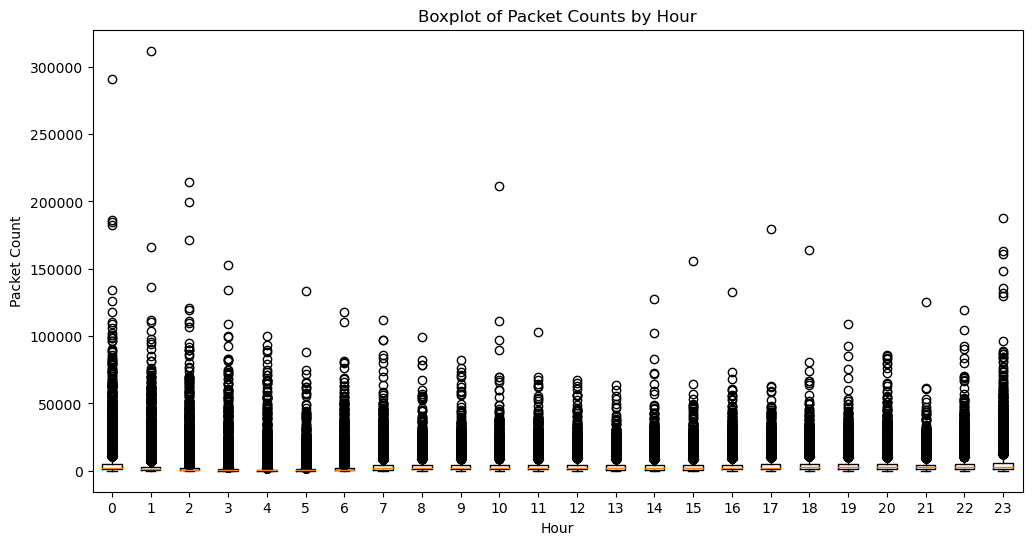

<Figure size 640x480 with 0 Axes>

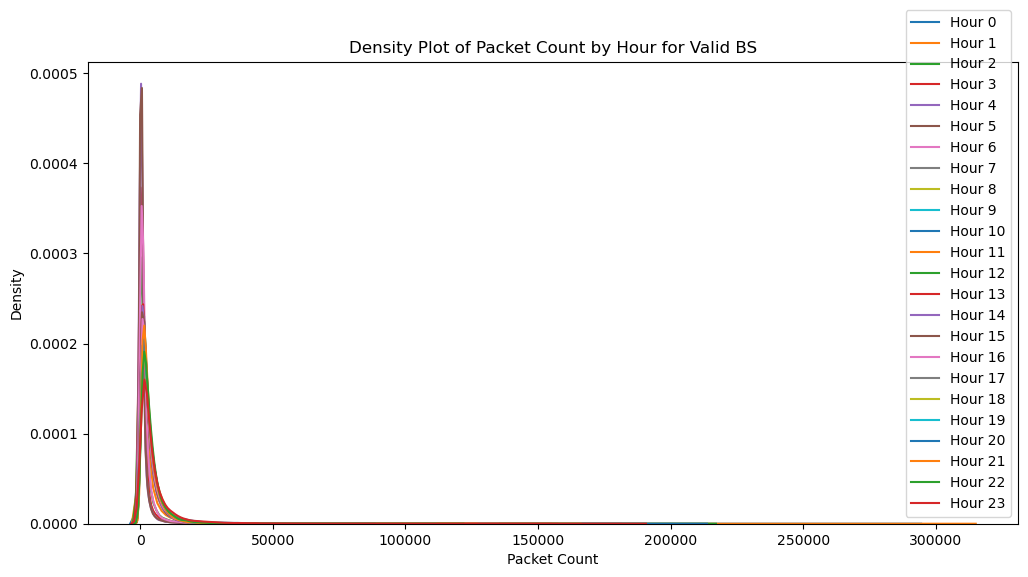

In [7]:
# 展示离群值，需要忽略掉nan，否则会影响箱线图

import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np

current_directory = os.getcwd()
# 读取csv文件
df = pd.read_csv(current_directory + '/valid_bs.csv',index_col=0)

# 将时间戳索引转换为datetime对象，并提取小时数
df.index = pd.to_datetime(df.index)
hours = df.index.hour

# 创建一个空的列表来保存按小时分组的数据
grouped = [df[hours == hour].values.flatten() for hour in range(24)]
grouped = [values[~np.isnan(values)] for values in grouped]

# print(grouped)
# 制作箱线图
plt.figure(figsize=(12, 6))
plt.boxplot(grouped, labels=range(24), positions=range(24))
plt.title('Boxplot of Packet Counts by Hour')
plt.xlabel('Hour')
plt.ylabel('Packet Count')
plt.xticks(range(24))  # 设置x轴的刻度位置和标签为0~23小时
plt.show()

plt.savefig( current_directory + '/outlier.png')


# 绘制每个小时的密度图
plt.figure(figsize=(12, 6))
for hour, values in enumerate(grouped):
    sns.kdeplot(values, label=f'Hour {hour}')
plt.xlabel('Packet Count')
plt.ylabel('Density')
plt.title('Density Plot of Packet Count by Hour for Valid BS')
plt.legend()
plt.show()

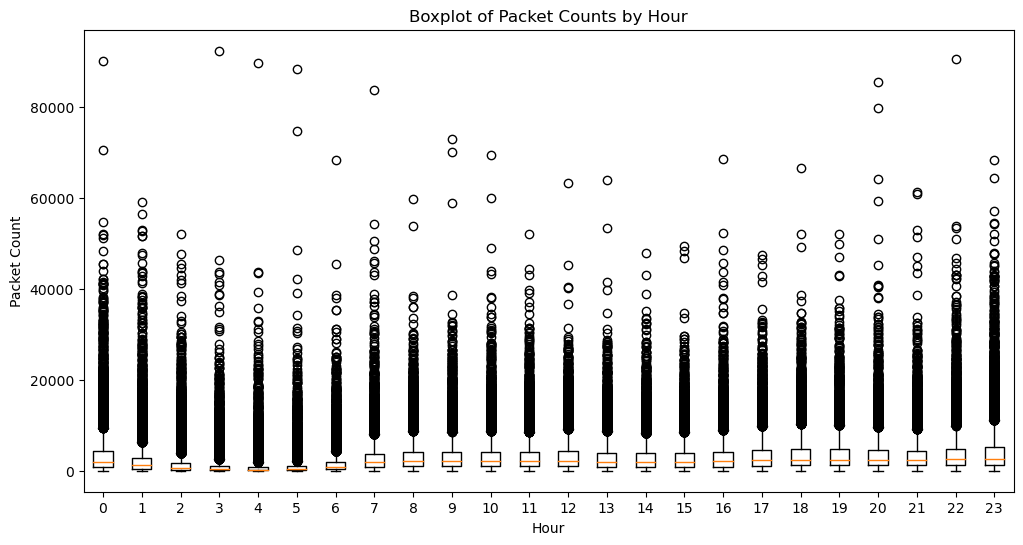

<Figure size 640x480 with 0 Axes>

In [8]:
# 去除离群值

import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

import os
current_directory = os.getcwd()
# 读取csv文件
df = pd.read_csv(current_directory + '/valid_bs.csv',index_col=0)


# 计算Z-score
z_scores = stats.zscore(df,nan_policy='omit')
# print(z_scores)
# 设置阈值
threshold = 3

# 将Z-score大于阈值的值设置为NaN
df[(np.abs(z_scores) > threshold)] = np.nan
# 输出到csv文件
df.to_csv(current_directory + '/valid_removeoutlier_bs.csv')

# # 找到值超过800000的基站id和对应的时间戳
# result = df[df > 400000].stack().reset_index()
# # 输出结果
# print(result)

# 将时间戳索引转换为datetime对象，并提取小时数
df.index = pd.to_datetime(df.index)
hours = df.index.hour
# 创建一个空的列表来保存按小时分组的数据
grouped = [df[hours == hour].values.flatten() for hour in range(24)]
grouped = [values[~np.isnan(values)] for values in grouped]
# 制作箱线图
plt.figure(figsize=(12, 6))
plt.boxplot(grouped, labels=range(24), positions=range(24))
plt.title('Boxplot of Packet Counts by Hour')
plt.xlabel('Hour')
plt.ylabel('Packet Count')
plt.xticks(range(24))  # 设置x轴的刻度位置和标签为0~23小时
plt.show()

plt.savefig(current_directory + '/valid_removeoutlier_bs.png')

(192, 1983)
(192, 1983)


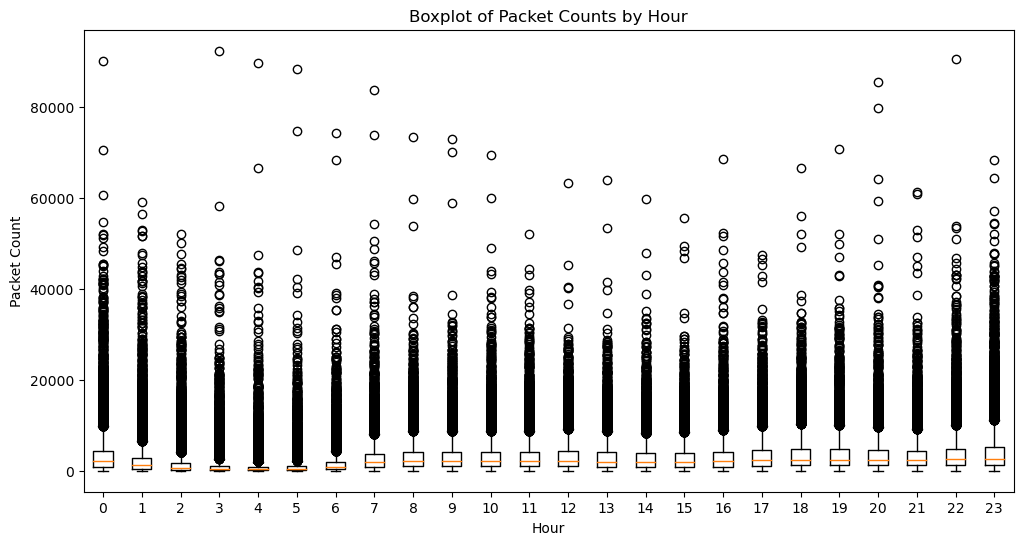

<Figure size 640x480 with 0 Axes>

In [9]:
# 填充NAN

import pandas as pd
import os
import matplotlib.pyplot as plt

current_directory = os.getcwd()
# 读取csv文件
df = pd.read_csv(current_directory + '/valid_removeoutlier_bs.csv', index_col=0)

# # 将NaN值替换为前一个小时的值
# df.fillna(method='ffill', inplace=True)

df = df.interpolate(method='linear')
print(df.shape)

df = df.fillna(method='ffill').fillna(method='bfill')

nan_locations = df.isna()

# 打印包含NaN值的行和列
for column in df.columns:
    if nan_locations[column].any():
        print(f"列 '{column}' 中的NaN值位于以下行：")
        print(nan_locations[nan_locations[column]].index.tolist())

# 删除包含NaN值的列
df = df.dropna(axis=1)
print(df.shape)
# # 找到值为NaN的行和列
# nan_rows = df[df.isnull().any(axis=1)]
# nan_cols = df.columns[df.isnull().any()].tolist()

# print('Rows with NaN values:')
# print(nan_rows)

# print('Columns with NaN values:')
# print(nan_cols)

# 将时间戳索引转换为datetime对象，并提取小时数
df.index = pd.to_datetime(df.index)
hours = df.index.hour
# 创建一个空的列表来保存按小时分组的数据
grouped = [df[hours == hour].values.flatten() for hour in range(24)]
grouped = [values[~np.isnan(values)] for values in grouped]

# 制作箱线图
plt.figure(figsize=(12, 6))
plt.boxplot(grouped, labels=range(24), positions=range(24))
plt.title('Boxplot of Packet Counts by Hour')
plt.xlabel('Hour')
plt.ylabel('Packet Count')
plt.xticks(range(24))  # 设置x轴的刻度位置和标签为0~23小时
plt.show()

plt.savefig(current_directory + '/fill_nan.png')

df.to_csv(current_directory + '/fill_nan.csv')

(192, 1983)


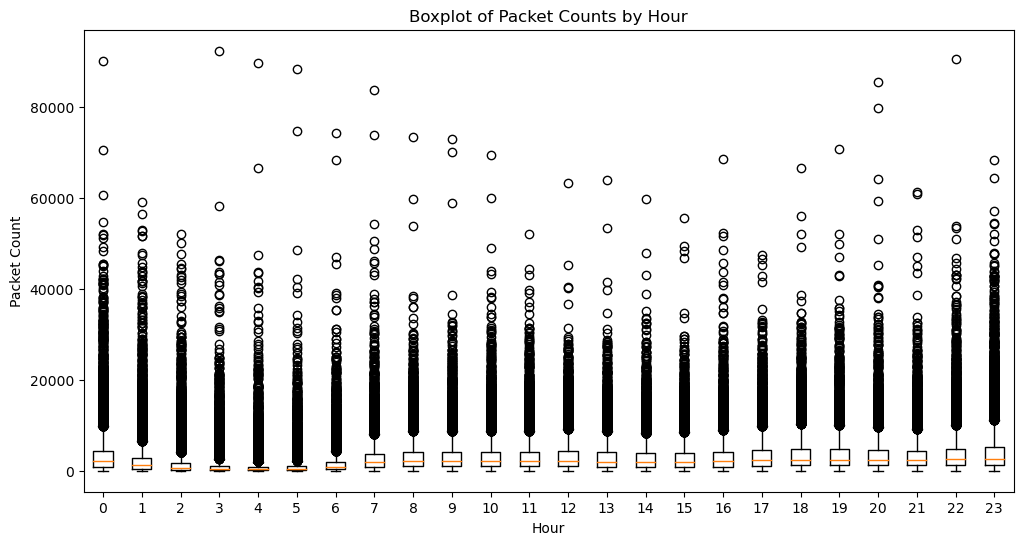

In [10]:
# normalization

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import os

current_directory = os.getcwd()
# 读取csv文件
df = pd.read_csv(current_directory + '/fill_nan.csv', index_col=0)
# 创建一个MinMaxScaler对象
# scaler = MinMaxScaler()
# # 对DataFrame的所有列进行归一化
# df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
print(df.shape)
df.index = pd.to_datetime(df.index)
hours = df.index.hour
# 创建一个空的列表来保存按小时分组的数据
grouped = [df[hours == hour].fillna(0).values.flatten() for hour in range(24)]
# 制作箱线图
plt.figure(figsize=(12, 6))
plt.boxplot(grouped, labels=range(24), positions=range(24))
plt.title('Boxplot of Packet Counts by Hour')
plt.xlabel('Hour')
plt.ylabel('Packet Count')
plt.xticks(range(24))  # 设置x轴的刻度位置和标签为0~23小时
plt.show()

# 保存新的CSV文件
df.to_csv(current_directory + '/normalized_file.csv')

In [11]:
import pandas as pd
import os

current_directory = os.getcwd()

# 读取csv文件
df = pd.read_csv(current_directory + '/normalized_file.csv', index_col=0)

# 将DataFrame保存为HDF5文件
print(type(df.index))
df.index = pd.to_datetime(df.index) # str -> datetime ，是必要的
print(type(df.index))
df.to_hdf('normalized_file.h5', key='df', mode='w')

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import haversine_distances
from math import radians
import os
current_directory = os.getcwd()

# 读取csv文件
df = pd.read_csv(current_directory + '/valid_topology.csv')
sensor_ids = df['bs'].unique().tolist()
# 创建bs id到0,1,2...的映射
sensor_id_to_ind  = {bs_id: i for i, bs_id in enumerate(df['bs'].unique())}
df['bs'] = df['bs'].map(sensor_id_to_ind )



# 将经纬度转换为弧度
df[['lon', 'lat']] = np.radians(df[['lon', 'lat']])
# 计算haversine距离
distances = haversine_distances(df[['lat', 'lon']], df[['lat', 'lon']]) * 6371000
# 创建邻接矩阵
distances_matrix = pd.DataFrame(distances, index=df['bs'], columns=df['bs'])
distances_matrix_np = distances_matrix.values
# 邻接矩阵单位是米
# print(distances_matrix_np,end='\n\n')

normalized_k = 0.1
distances = distances_matrix_np[~np.isinf(distances_matrix_np)].flatten()
std = distances.std()
adj_mx = np.exp(-np.square(distances_matrix / std))
# Make the adjacent matrix symmetric by taking the max.
# adj_mx = np.maximum.reduce([adj_mx, adj_mx.T])
# Sets entries that lower than a threshold, i.e., k, to zero for sparsity.
# 这行代码将邻接矩阵中所有小于阈值normalized_k的元素设置为零。这样可以增加邻接矩阵的稀疏性，也就是说，只有那些距离较大（即原始距离矩阵中的值较大）的基站之间才会有连接。
adj_mx[adj_mx < normalized_k] = 0

print(f"sensor_ids: {sensor_ids}")
print(f"sensor_id_to_ind: {sensor_id_to_ind}")
print(f"adj_mx: {adj_mx}")
print(f"{type(adj_mx)}")
adj_mx = adj_mx.values
print(f"{type(adj_mx)}")

father_directory = os.path.abspath(os.path.dirname(os.getcwd()))

import pickle
with open(father_directory + "/data/traffic/data/sensor_graph/adj_mx.pkl", 'wb') as f:
    pickle.dump([sensor_ids, sensor_id_to_ind, adj_mx], f, protocol=2)

sensor_ids: [906, 1948, 2351, 2355, 2477, 2493, 2613, 2618, 2713, 2844, 2845, 2847, 2852, 2857, 2995, 3039, 3053, 3139, 3205, 3211, 3281, 3282, 3286, 3396, 3416, 3444, 3450, 3480, 3484, 3493, 3522, 3530, 3560, 3618, 3644, 3657, 3666, 3707, 3713, 3714, 3753, 3807, 3808, 3809, 3823, 3828, 3835, 3836, 3839, 3884, 3889, 3890, 3908, 3926, 3954, 3963, 3972, 3975, 4001, 4007, 4056, 4067, 4109, 4112, 4118, 4124, 4155, 4156, 4158, 4171, 4183, 4195, 4225, 4226, 4227, 4228, 4233, 4239, 4248, 4249, 4252, 4255, 4280, 4290, 4350, 4353, 4366, 4367, 4369, 4373, 4375, 4387, 4388, 4400, 4402, 4407, 4432, 4434, 4436, 4440, 4441, 4443, 4445, 4449, 4460, 4464, 4473, 4474, 4477, 4480, 4488, 4489, 4500, 4501, 4509, 4518, 4519, 4539, 4540, 4542, 4545, 4553, 4562, 4564, 4567, 4570, 4573, 4589, 4590, 4591, 4594, 4600, 4601, 4605, 4606, 4614, 4617, 4629, 4633, 4636, 4640, 4642, 4645, 4647, 4649, 4652, 4653, 4657, 4660, 4661, 4672, 4673, 4677, 4680, 4684, 4696, 4700, 4702, 4704, 4707, 4711, 4724, 4727, 4728, 4736

In [ ]:
# 到此为止

In [ ]:
import logging
import sys
import datetime

def init_logger(filename, logger_name):
    '''
    @brief:
        initialize logger that redirect info to a file just in case we lost connection to the notebook
    @params:
        filename: to which file should we log all the info
        logger_name: an alias to the logger
    '''
    # 创建一个logger
    logger = logging.getLogger(logger_name)
    logger.setLevel(logging.DEBUG)  # 设置日志级别
    logger.propagate = False  # 禁止日志传播
    # 创建一个handler，用于写入日志文件
    fh = logging.FileHandler(filename)
    fh.setLevel(logging.DEBUG)  # 设置handler的日志级别

    # 创建一个formatter，用于设置日志格式
    formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')

    # 将formatter添加到handler
    fh.setFormatter(formatter)

    # 将handler添加到logger
    logger.addHandler(fh)
    logger.info('### Init. Logger {} ###'.format(logger_name))
    return logger

# Initialize
czh_logger = init_logger("czh_notebook.log", "czh_logger")

In [ ]:
import pandas as pd
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import dtw
from sklearn.metrics import silhouette_score
import os
current_directory = os.getcwd()

# 读取csv文件
df = pd.read_csv(current_directory + '/normalized_file.csv', index_col=0)
czh_logger.info(df.shape) # (192, 7521) ，论文示例显示是2,071个，说明我筛选力度不够大
# 将数据转换为适合tslearn处理的格式
formatted_data = df.T.values.reshape((df.shape[1], df.shape[0], 1))

clusters = 5
# 定义并训练模型
model = TimeSeriesKMeans(n_clusters=clusters, metric='dtw', verbose=False, max_iter=5, max_iter_barycenter=5, random_state=0)
labels = model.fit_predict(formatted_data)
# czh_logger.info(labels) arrary 输出不全，需要转换成label


# 将基站id和分类结果写入到文件中
with open(current_directory + '/cluster_label.txt', 'w') as f:
    for bs_id, label in zip(df.columns, labels):
        f.write(f'{bs_id}, {label}\n')
czh_logger.info(labels.shape)

# 计算Silhouette index，时间的大头花在这里
# silhouette_avg = silhouette_score(df.T, labels, metric=dtw) # (n_samples_a, n_features)
# czh_logger.info(f"Silhouette index: {silhouette_avg}")

In [ ]:
from tslearn.generators import random_walks
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import dtw
import os
current_directory = os.getcwd()

X = random_walks(n_ts=1, sz=192, d=1)

model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5,
                          max_iter_barycenter=5,
                          random_state=0)
labels = model.fit_predict(X)


czh_logger.info(labels)


In [ ]:
import pandas as pd

# 假设dates是一个包含你的日期时间字符串的列表
dates = ['2012-08-19 00:00:00', '2012-08-19 01:00:00', '2012-08-19 02:00:00']

# 将字符串转换为日期时间类型
datetime_dates = pd.to_datetime(dates)
print(datetime_dates)

Cluster 0:
Base stations len: 195
Center base station: 4285.0
Missing base station IDs: []
Cluster 1:
Base stations len: 236
Center base station: 6564.0
Missing base station IDs: []
Cluster 2:
Base stations len: 78
Center base station: 7136.0
Missing base station IDs: []
Cluster 3:
Base stations len: 263
Center base station: 7348.0
Missing base station IDs: []
Cluster 4:
Base stations len: 33
Center base station: 4477.0
Missing base station IDs: []
Cluster 5:
Base stations len: 223
Center base station: 4972.0
Missing base station IDs: []
Cluster 6:
Base stations len: 42
Center base station: 5128.0
Missing base station IDs: []
Cluster 7:
Base stations len: 99
Center base station: 5793.0
Missing base station IDs: []
Cluster 8:
Base stations len: 212
Center base station: 5673.0
Missing base station IDs: []
Cluster 9:
Base stations len: 188
Center base station: 6065.0
Missing base station IDs: []
Cluster 10:
Base stations len: 92
Center base station: 5642.0
Missing base station IDs: []
Clu

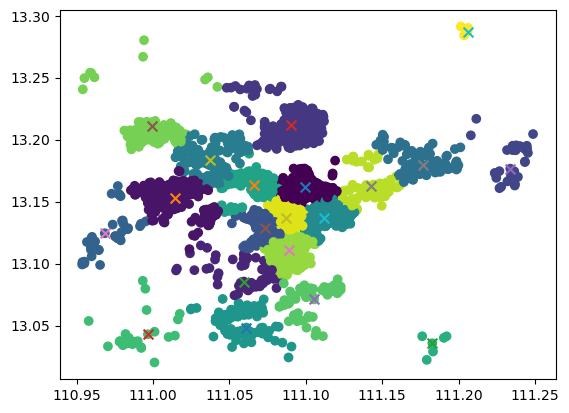

(2617, 3)


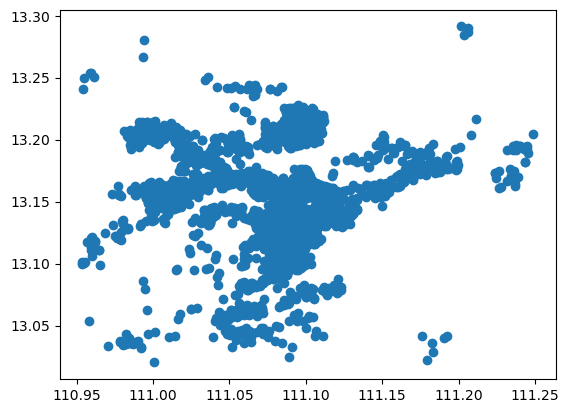

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial import distance
import matplotlib.pyplot as plt
import os

current_directory = os.getcwd()
# 读取数据
df = pd.read_csv(current_directory + '/valid_topology.csv')
df_data = pd.read_csv(current_directory + '/normalized_file.csv', index_col=0)
df_data.columns = df_data.columns.astype(int)
# print(df_data)
# print(df_data[[617,626]])
clsuters = 20
# 使用KMeans进行聚类
kmeans = KMeans(n_clusters=clsuters, random_state=0,n_init='auto').fit(df[['lon', 'lat']])

# 将聚类标签添加到数据框中
df['cluster'] = kmeans.labels_

# 找到每个类的中心基站
centers = kmeans.cluster_centers_
closest_bs = []
for i in range(clsuters):
    center = centers[i]
    closest_bs.append(df.iloc[((df['lon']-center[0])**2 + (df['lat']-center[1])**2).idxmin()]['bs'])

# 打印每个类的基站id和中心基站的id
for i in range(clsuters):
    print(f"Cluster {i}:")
    cluster_df = df[df['cluster']==i]
    bs_ids = cluster_df['bs'].tolist() # 得到该类中的所有bs id
    print("Base stations len:", len(bs_ids))
    print("Center base station:", closest_bs[i])
    
    missing_bs_ids = [bs_id for bs_id in bs_ids if bs_id not in df_data.columns]
    print('Missing base station IDs:', missing_bs_ids)
    
    data_cluster = df_data[bs_ids]
    data_cluster.index = pd.to_datetime(data_cluster.index) # str -> datetime ，是必要的
    data_cluster.to_hdf(f'cluster_{i}.h5', key='df', mode='w')

# 绘制所有基站的位置，不同的类使用不同的颜色
plt.scatter(df['lon'], df['lat'], c=df['cluster'])

# 使用特殊符号标识每个类的中心基站
for i in range(clsuters):
    bs = df[df['bs']==closest_bs[i]]
    plt.scatter(bs['lon'], bs['lat'], marker='x', s=50)

plt.show()



df2 = pd.read_csv(current_directory + '/valid_topology.csv')
# 绘制散点图
plt.scatter(df2['lon'], df2['lat'])
print(df2.shape)
# 显示图形
plt.show()